Prédiction de la note des films IMDB par l’algorithme de régression par Réseaux de neurones:  Sickit-learn VS Pytorch. 
L’échantillon de base est composé de 84429 films et 20 variables



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#libs pour la modélisation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression

#importer les données dans un df

imdb=pd.read_csv("./......")
imdb.head(2)

,Titre,Date parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,Note,Votes,Note hommes,Votes hommes,Note femmes,Votes femmes,Note USA,Votes USA,Note hors USA,Votes hors USA
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154.0,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0
1,The Story of the Kelly Gang,1906-12-26,Biography,70.0,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589.0,6.1,425.0,6.2,50.0,6.0,96.0,6.2,331.0


In [3]:
#renommer les colonnes ayant un espace dans le nom, remplacer l'espace par underscore.
imdb=imdb.rename(columns= {"Date parution":"Date_parution",
                         
                          "Note hommes":"Note_hommes",  
                          
                          "Votes hommes":"Votes_hommes", 
                         
                          "Note femmes":"Note_femmes",
                         
                          "Votes femmes":"Votes_femmes", 
                         
                          "Note USA":"Note_USA",	
                         
                         "Votes USA":"Votes_USA",
                         
                         "Note hors USA":"Note_hors_USA",
                         
                         "Votes hors USA":"Votes_hors_USA"
                         
                        }
                )
# fichier brute avant transformation des variables
imdb.head(1)

,Titre,Date_parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,Note,Votes,Note_hommes,Votes_hommes,Note_femmes,Votes_femmes,Note_USA,Votes_USA,Note_hors_USA,Votes_hors_USA
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154.0,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0


In [4]:
imdb.shape

(84429, 20)

In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84429 entries, 0 to 84428
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titre           84429 non-null  object 
 1   Date_parution   84429 non-null  object 
 2   Genre           83503 non-null  object 
 3   Durée           83725 non-null  float64
 4   Pays            84368 non-null  object 
 5   Langue          83525 non-null  object 
 6   Réalisateur     84346 non-null  object 
 7   Auteur          82901 non-null  object 
 8   Producteur      80057 non-null  object 
 9   Acteurs         84360 non-null  object 
 10  Note            84429 non-null  float64
 11  Votes           84429 non-null  float64
 12  Note_hommes     84429 non-null  float64
 13  Votes_hommes    84429 non-null  float64
 14  Note_femmes     84429 non-null  float64
 15  Votes_femmes    84429 non-null  float64
 16  Note_USA        84429 non-null  float64
 17  Votes_USA       84429 non-null 

In [6]:
#statistiques descriptives des variables quantitatives(numériques)
imdb.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
Durée,83725.0,100.3283,22.5535,41.0,88.0,96.0,108.0,808.0
Note,84429.0,5.9002,1.2332,1.0,5.2,6.1,6.8,9.9
Votes,84429.0,9602.6633,53953.4175,99.0,206.0,488.0,1789.0,2278845.0
Note_hommes,84429.0,5.8194,1.2466,1.0,5.1,6.0,6.7,10.0
Votes_hommes,84429.0,6097.7746,33880.9729,4.0,133.0,311.0,1156.0,1409165.0
Note_femmes,84429.0,6.0406,1.3441,1.0,5.3,6.3,7.0,10.0
Votes_femmes,84429.0,1381.3251,7724.5016,1.0,22.0,58.0,229.0,278964.0
Note_USA,84429.0,5.9259,1.3073,1.0,5.2,6.1,6.8,10.0
Votes_USA,84429.0,1661.6065,8499.0273,1.0,24.0,81.0,338.0,348363.0
Note_hors_USA,84429.0,5.7517,1.2835,1.0,5.0,6.0,6.7,10.0



**Sélection des variable à inclure dans le modèle , aprés trandformation de certaines variables , telque présenté dans l'autre fichier:** 

In [78]:

X = imdb[["Durée","Genre_groupé","Origines","Langue_binaire","Votes_hommes","Votes_femmes","Votes_USA","Votes_hors_USA","Ancienneté_du_film"]]
y=imdb["Note"]


### On identifie les colonnes numériques et catégorielles.

In [82]:
# Créez une liste nommée variables_num qui ne contient que les noms de colonnes numériques du dataframe X
variables_num = list(X.select_dtypes(exclude = ['object']))
variables_num

['Durée',
 'Langue_binaire',
 'Votes_hommes',
 'Votes_femmes',
 'Votes_USA',
 'Votes_hors_USA',
 'Ancienneté_du_film']

In [83]:
# Créez une liste nommée variables_cat qui ne contient que les noms de colonnes catégorielles du dataframe X
variables_cat = list(X.select_dtypes(include = ['object']))
variables_cat

['Genre_groupé', 'Origines']

### Diviser l'échantillon

In [85]:
# On sépare temporairement les données en entraînement et en test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1
    )

In [86]:
# On redivise X_train pour conserver des données d'entraînement et créer un ensemble de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.25, random_state = 1
    )

In [87]:
print("X_train: {0}".format(X_train.shape))
print("X_val: {0}".format(X_val.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (38445, 9)
X_val: (12816, 9)
X_test: (12816, 9)


In [88]:
X_train.isna().sum()

Durée                 327
Genre_groupé          441
Origines               14
Langue_binaire        346
Votes_hommes            0
Votes_femmes            0
Votes_USA               0
Votes_hors_USA          0
Ancienneté_du_film      0
dtype: int64

X_train["Genre"].value_counts()


 Comme l'imputation des valeurs manquantes variera selon le type de variable, on sépare les variables numériques et catégorielles dans chacun des échantillons.

In [91]:
X_train_num = X_train[variables_num]
X_train_cat = X_train[variables_cat]

X_val_num = X_val[variables_num]
X_val_cat = X_val[variables_cat]

X_test_num = X_test[variables_num]
X_test_cat = X_test[variables_cat]

### Imputer les valeurs manquantes
Comme les méthodes de Scikit-Learn vont produire des arrays et que nous les retransformerons en dataframe pour améliorer la lisibilité dans les étapes intermédiaires, nous allons conserver en mémoire le nom des index de chaque ligne. Cela permettra de concatener des dataframes plus facilement (par exemple, regrouper la variable cible avec les caractéristiques correspondantes).

In [93]:
index_train = X_train.index
index_val = X_val.index
index_test = X_test.index

### Variables numériques
Pour les variables numériques, on va remplacer toutes les données manquantes par la médiane de l'échantillon d'entraînement.

In [95]:
# On trouve la médiane de chaque colonne numérique
imp_num = SimpleImputer(strategy = "median").fit(X_train_num)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_num = imp_num.transform(X_train_num)
X_val_num = imp_num.transform(X_val_num)
X_test_num = imp_num.transform(X_test_num)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_num = pd.DataFrame(X_train_num, columns = variables_num, index = index_train)
X_val_num = pd.DataFrame(X_val_num, columns = variables_num, index = index_val)
X_test_num = pd.DataFrame(X_test_num, columns = variables_num, index = index_test)

### Variables catégorielles
Pour les variables catégorielles, on va remplacer toutes les données manquantes par le mode de l'échantillon d'entraînement.

In [97]:
# Remplacez les données catégorielles manquantes
# On trouve la médiane de chaque colonne numérique
imp_cat = SimpleImputer(strategy = "most_frequent").fit(X_train_cat)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_cat = imp_cat.transform(X_train_cat)
X_val_cat = imp_cat.transform(X_val_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_cat = pd.DataFrame(X_train_cat, columns = variables_cat, index = index_train)
X_val_cat = pd.DataFrame(X_val_cat, columns = variables_cat, index = index_val)
X_test_cat = pd.DataFrame(X_test_cat, columns = variables_cat, index = index_test)


On peut ensuite recombiner les variables numériques et catégorielles dans chacun des dataframes.

In [99]:
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_val = pd.concat([X_val_num, X_val_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)


### Encoder les variables catégorielles
Il faut encoder les variables catégorielles sous forme de nombre entier pour que l'information puisse être utilisée dans les modèles d'apprentissage automatiqu

In [101]:
# Encodez les variables catégorielles à l'aide de ColumnTransformer
columnTransformer = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(drop = "first"), variables_cat)],
    remainder = "passthrough"
)

X_train = pd.DataFrame(
    columnTransformer.fit_transform(X_train).toarray(),
    columns = columnTransformer.get_feature_names_out(),
    index = index_train
)

X_val = pd.DataFrame(
    columnTransformer.transform(X_val).toarray(),
    columns = columnTransformer.get_feature_names_out(),
    index = index_val
)

X_test = pd.DataFrame(
    columnTransformer.transform(X_test).toarray(),
    columns = columnTransformer.get_feature_names_out(),
    index = index_test
)

In [102]:
# On conserve le nom des colonnes après l'encodage
colonnes_apres_encodage = X_train.columns

### Standardiser les variables explicatives

Les variables sont mises à l'échelle à l'aide de RobustScaler qui est moins sensible aux valeurs extrêmes.

In [104]:
# Calibration de la standardisation sur l'ensemble d'entraînement
transformer = RobustScaler().fit(X_train)

In [105]:
# Application tous les échantillons
X_train = transformer.transform(X_train)
X_val = transformer.transform(X_val)
X_test = transformer.transform(X_test)

In [106]:
# Conversion en dataframe
X_train = pd.DataFrame(X_train, columns = colonnes_apres_encodage, index = index_train)
X_val = pd.DataFrame(X_val, columns = colonnes_apres_encodage, index = index_val)
X_test = pd.DataFrame(X_test, columns = colonnes_apres_encodage, index = index_test)

#df après normalisation

X_train

In [108]:
print("X_train: {0}".format(X_train.shape))
print("X_val: {0}".format(X_val.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (38445, 32)
X_val: (12816, 32)
X_test: (12816, 32)


**Modèle de regression par réseau de neuronnes en sickit learn**

**Généralités sur le modèle utilisé:**

Le modèle est un réseau de neurones à couches entièrement connectées (dense), avec deux couches cachées (64 et 32 neurones).  
La fonction d’activation ReLU introduit de la non-linéarité, permettant au réseau d’apprendre des relations complexes.



La sortie du réseau est donnée par :

$$
\hat{y} = f(\mathbf{x}) = \mathbf{W}_3 \, \sigma \left( \mathbf{W}_2 \, \sigma \left( \mathbf{W}_1 \, \mathbf{x} + \mathbf{b}_1 \right) + \mathbf{b}_2 \right) + \mathbf{b}_3
$$

où 
$$\mathbf{W}_i  \  et \  \mathbf{b}_i$$ sont les matrices/vecteurs de  poids et biais de chaque couche i et $$ \sigma \ $$ est la fonction ReLU.

In [156]:
# modèle de regression par réseau de neurones( deux couches cachées: 64 neurones, 32 neuronnes, 1 neurone de sortie et activation relu)
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modèle de Réseau de neurones simple
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42, early_stopping=True)
mlp.fit(X_train, y_train)

# Prédiction
y_pred_mlp = mlp.predict(X_val)
# Clip pour rester dans l'intervalle valide
y_pred_mlp = y_pred_mlp.clip(1, 10)

# Évaluation
mae_mlp = mean_absolute_error(y_val, y_pred_mlp)
r2_mlp = r2_score(y_val, y_pred_mlp)

print(f"MAE MLP: {mae_mlp:.3f}")
print(f"R² MLP: {r2_mlp:.3f}")

MAE MLP: 0.653
R² MLP: 0.481


In [157]:
# Prédiction
y_test_pred_mlp = mlp.predict(X_test)
# Clip pour rester dans l'intervalle valide des notes entre 1et 10
y_test_pred_mlp = y_test_pred_mlp.clip(1, 10)

# Évaluation
mae_mlp_test = mean_absolute_error(y_test, y_test_pred_mlp)


print(f"MAE MLP Test: {mae_mlp_test:.3f}")


MAE MLP Test: 0.653


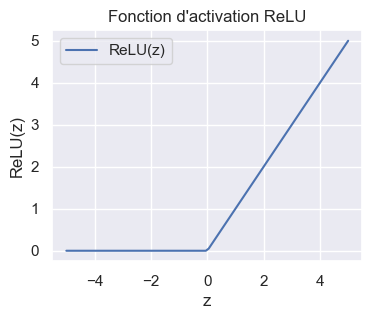

In [158]:
# présentation générale de la fonction d,activation Relu
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 100)
relu = np.maximum(0, z)

plt.figure(figsize=(4,3))
plt.plot(z, relu, label='ReLU(z)')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.title('Fonction d\'activation ReLU')
plt.grid(True)
plt.legend()
plt.show()

In [159]:
# Extraction des poids et biais( Dernière époque)
weights = mlp.coefs_      # Liste des matrices de poids entre chaque couche
biases = mlp.intercepts_  # Liste des vecteurs de biais pour chaque couche

# Affichage des rangs des matrices (entrants, sortant) des poinds
for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Couche {i+1}: poids shape={w.shape}, biais shape={b.shape}")

Couche 1: poids shape=(32, 64), biais shape=(64,)
Couche 2: poids shape=(64, 32), biais shape=(32,)
Couche 3: poids shape=(32, 1), biais shape=(1,)


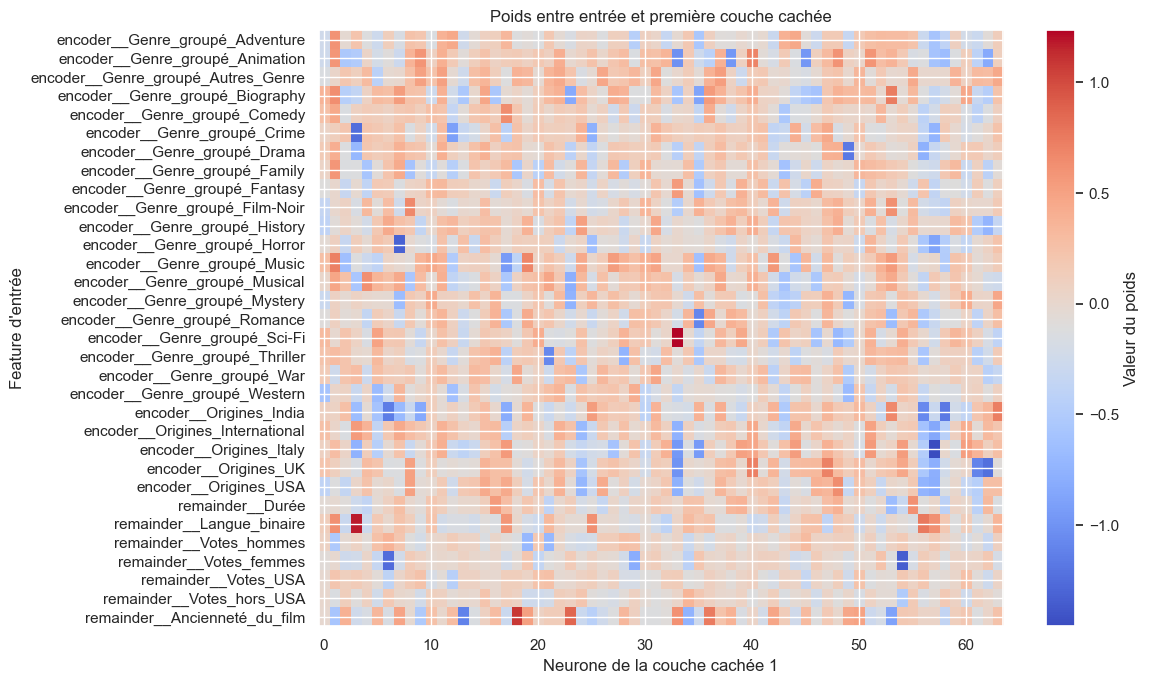

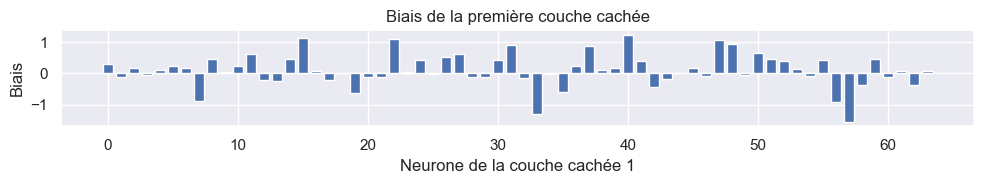

In [161]:
feature_names = X_train.columns  # ou une liste de noms de variables ou features  du modèle

# Visualisation des poids de la première couche (entrée -> couche cachée 1) à dernière époch
plt.figure(figsize=(12, 7))
plt.imshow(weights[0], aspect='auto', cmap='coolwarm')
plt.colorbar(label='Valeur du poids')
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Feature d\'entrée')
plt.title('Poids entre entrée et première couche cachée')

# Ajout des noms de features
plt.yticks(np.arange(len(feature_names)), feature_names)

plt.tight_layout()
plt.show()

# Visualisation des biais de la première couche cachée à la dernière èpoch
plt.figure(figsize=(10, 2))
plt.bar(range(len(biases[0])), biases[0])
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Biais')
plt.title('Biais de la première couche cachée')
plt.tight_layout()
plt.show()

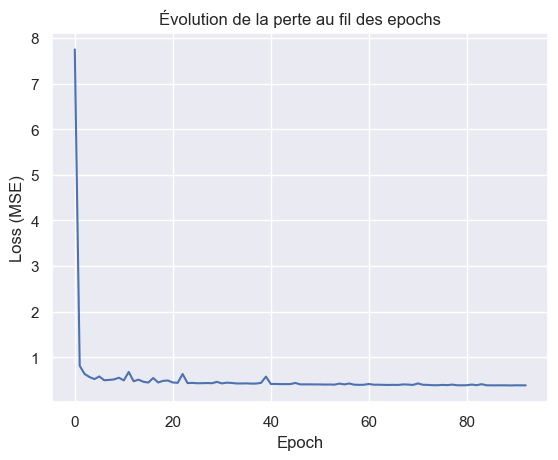

In [162]:
# visualiser la perte par epochs
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Évolution de la perte au fil des epochs')
plt.grid(True)
plt.show()

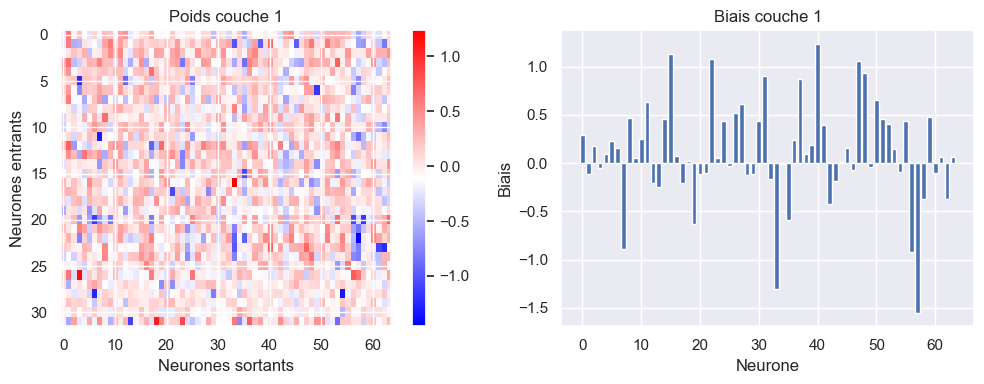

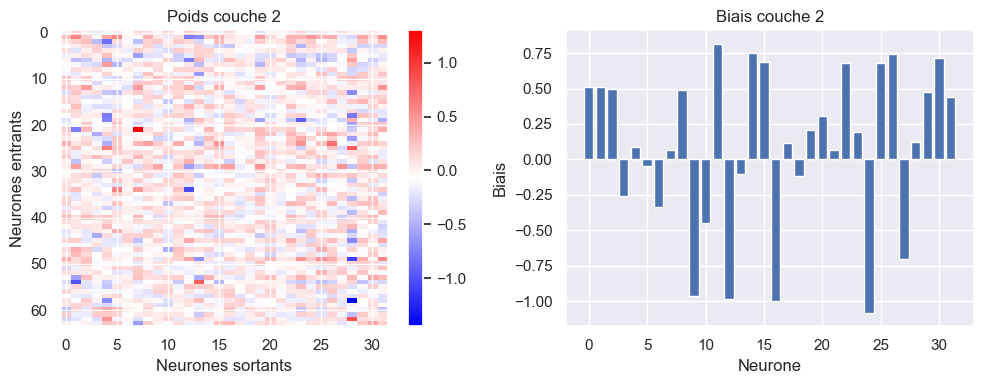

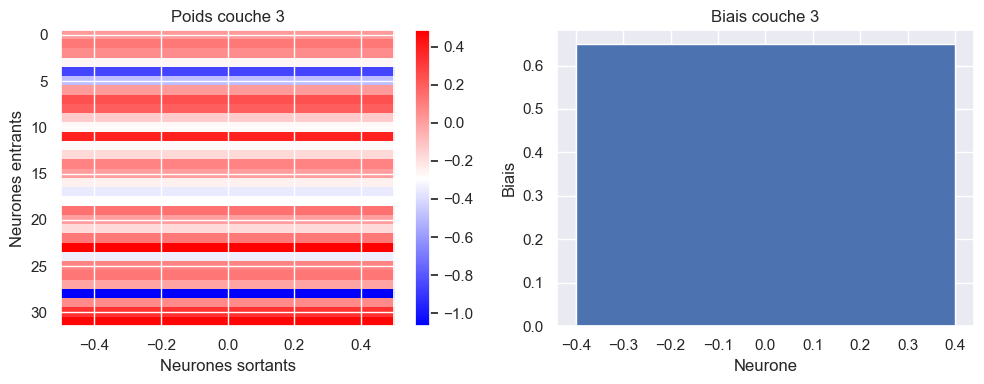

In [163]:
#visualiser les poids wi par neurone et par couche à la dernière epoch
for i, (w, b) in enumerate(zip(weights, biases)):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(w, aspect='auto', cmap='bwr')
    plt.colorbar()
    plt.title(f'Poids couche {i+1}')
    plt.xlabel('Neurones sortants')
    plt.ylabel('Neurones entrants')
    plt.subplot(1,2,2)
    plt.bar(range(len(b)), b)
    plt.title(f'Biais couche {i+1}')
    plt.xlabel('Neurone')
    plt.ylabel('Biais')
    plt.tight_layout()
    plt.show()

In [164]:
#la couche 3 est constutuée par un seul neurone sortant ( axe des abscisses)

**implémetation  du modèle avec la lib Pytorch**

Epoch 0, Train Loss 39.8091, Val Loss 38.8779
Epoch 10, Train Loss 34.7988, Val Loss 34.3771
Epoch 20, Train Loss 33.0595, Val Loss 32.5270
Epoch 30, Train Loss 30.1692, Val Loss 29.6616
Epoch 40, Train Loss 26.2290, Val Loss 25.6519
Epoch 50, Train Loss 20.8741, Val Loss 20.2058
Epoch 60, Train Loss 14.3118, Val Loss 13.6192
Epoch 70, Train Loss 7.9075, Val Loss 7.3740
Epoch 80, Train Loss 3.8538, Val Loss 3.6802
Epoch 90, Train Loss 2.8502, Val Loss 2.8707
Epoch 100, Train Loss 2.5530, Val Loss 2.5458
Epoch 110, Train Loss 2.1037, Val Loss 2.1052
Epoch 120, Train Loss 1.8428, Val Loss 1.8621
Epoch 130, Train Loss 1.6610, Val Loss 1.6754
Epoch 140, Train Loss 1.4904, Val Loss 1.5064
Epoch 150, Train Loss 1.3809, Val Loss 1.4113
Epoch 160, Train Loss 1.3115, Val Loss 1.3668
Epoch 170, Train Loss 1.2675, Val Loss 1.2898
Epoch 180, Train Loss 1.2229, Val Loss 1.2554
Epoch 190, Train Loss 1.1985, Val Loss 1.2242
Epoch 200, Train Loss 1.1767, Val Loss 1.1991
Epoch 210, Train Loss 1.1570, V

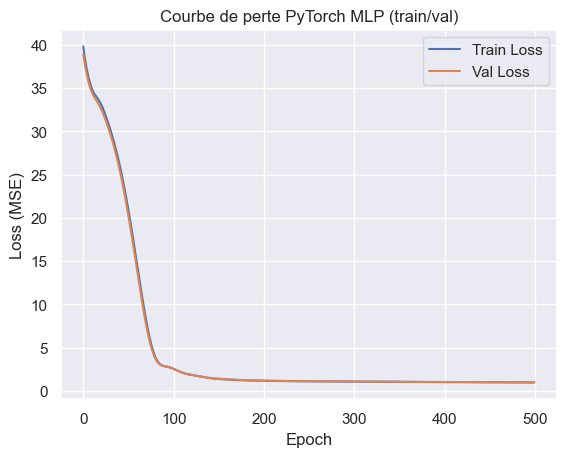

Train MSE: 0.9852, MAE: 0.7447, R²: 0.3443
Val   MSE: 0.9962, MAE: 0.7492, R²: 0.3503
Test  MSE: 0.9945, MAE: 0.7415, R²: 0.3465
Couche 1 - Poids shape: torch.Size([64, 32])
[[ 0.1862794   0.28621158 -0.03569048 ... -0.16692829  0.20106164
  -0.26967254]
 [ 0.19989537  0.19022384  0.09278557 ... -0.01518134  0.11874004
   0.01332333]
 [ 0.11449248  0.11816843  0.2533803  ...  0.06324471 -0.15500349
  -0.04857891]
 ...
 [-0.19605851 -0.2074886  -0.11843783 ...  0.03099717  0.11815268
   0.0321912 ]
 [ 0.08511453  0.07499834  0.01256574 ... -0.10403755  0.03707753
  -0.21149252]
 [ 0.20174806  0.05316201  0.09806786 ...  0.00931424  0.04600144
   0.2448535 ]]
Couche 1 - Biais shape: torch.Size([64])
[ 0.23579776  0.1963299   0.08475029  0.1432668   0.3651723  -0.03229446
  0.045612    0.09798949  0.21121168 -0.10846754 -0.06703646 -0.11104624
 -0.20651712  0.1505811   0.19127117  0.12044426  0.28167772  0.14452524
  0.2651159  -0.0517625   0.22679082  0.1764652   0.01443472  0.22973531
 

In [171]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pour la reproductibilité
torch.manual_seed(42)
np.random.seed(42)

# Conversion DataFrame --> tensor
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_torch   = torch.tensor(X_val.values,   dtype=torch.float32)
y_val_torch   = torch.tensor(y_val.values,   dtype=torch.float32).view(-1, 1)
X_test_torch  = torch.tensor(X_test.values,  dtype=torch.float32)
y_test_torch  = torch.tensor(y_test.values,  dtype=torch.float32).view(-1, 1)

# Modèle MLP identique à scikit-learn (hidden_layer_sizes=(64, 32), activation='relu')
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.net(x)

model = MLPRegressor(X_train_torch.shape[1])

# Optimiseur Adam, perte MSE (comme scikit-learn)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping
best_val_loss = float('inf')
best_weights = None
patience = 20
counter = 0
max_epochs = 500
losses = []
val_losses = []

for epoch in range(max_epochs):
    # Entraînement
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_torch)
        val_loss = criterion(val_outputs, y_val_torch).item()
        val_losses.append(val_loss)
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_weights = model.state_dict()
        counter = 0
    else:
        counter += 1
    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Train Loss {loss.item():.4f}, Val Loss {val_loss:.4f}")

# Remettre les meilleurs poids (early stopping)
if best_weights is not None:
    model.load_state_dict(best_weights)

# Courbe de perte (train et validation)
plt.plot(losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Courbe de perte PyTorch MLP (train/val)')
plt.legend()
plt.show()

# Prédictions
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_torch).numpy().flatten()
    y_pred_val   = model(X_val_torch).numpy().flatten()
    y_pred_test  = model(X_test_torch).numpy().flatten()

# Métriques comme scikit-learn
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train  = r2_score(y_train, y_pred_train)

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val  = r2_score(y_val, y_pred_val)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test  = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}")
print(f"Val   MSE: {mse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f}")
print(f"Test  MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}")

# Poids et biais du réseau
for i, layer in enumerate([layer for layer in model.net if isinstance(layer, nn.Linear)]):
    print(f"Couche {i+1} - Poids shape: {layer.weight.shape}")
    print(layer.weight.detach().numpy())
    print(f"Couche {i+1} - Biais shape: {layer.bias.shape}")
    print(layer.bias.detach().numpy())

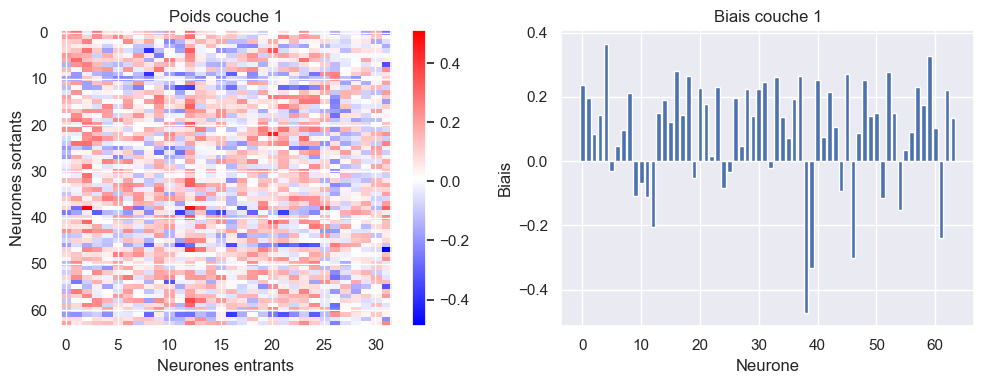

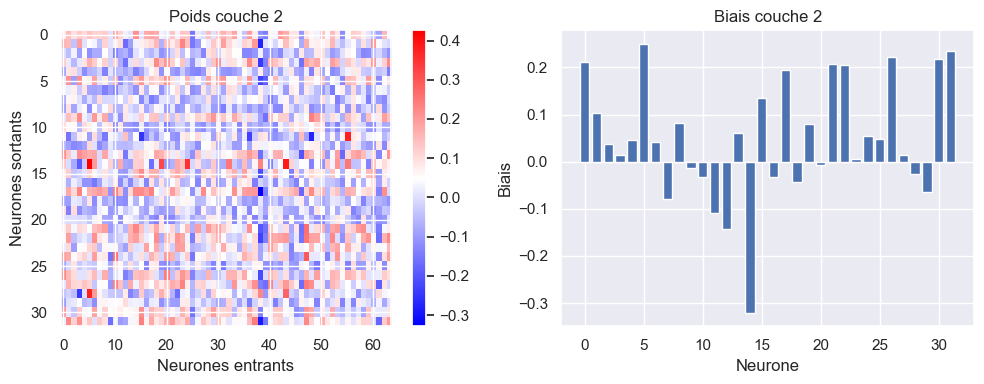

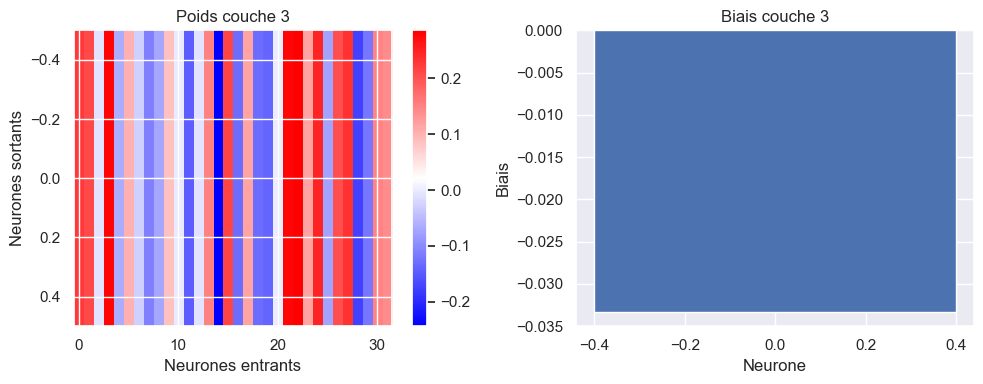

In [172]:
# Récupération des poids et biais de chaque couche linéaire( de la dernière époch)
linear_layers = [layer for layer in model.net if isinstance(layer, nn.Linear)]
weights = [layer.weight.detach().cpu().numpy() for layer in linear_layers]
biases  = [layer.bias.detach().cpu().numpy() for layer in linear_layers]

for i, (w, b) in enumerate(zip(weights, biases)):
    plt.figure(figsize=(10, 4))
    # Heatmap des poids
    plt.subplot(1, 2, 1)
    plt.imshow(w, aspect='auto', cmap='bwr')
    plt.colorbar()
    plt.title(f'Poids couche {i+1}')
    plt.xlabel('Neurones entrants')
    plt.ylabel('Neurones sortants')
    # Barplot des biais
    plt.subplot(1, 2, 2)
    plt.bar(range(len(b)), b)
    plt.title(f'Biais couche {i+1}')
    plt.xlabel('Neurone')
    plt.ylabel('Biais')
    plt.tight_layout()
    plt.show()

In [173]:
#la couche 3 est constituée par un seul neurone sortant ( axe des ordonnées)

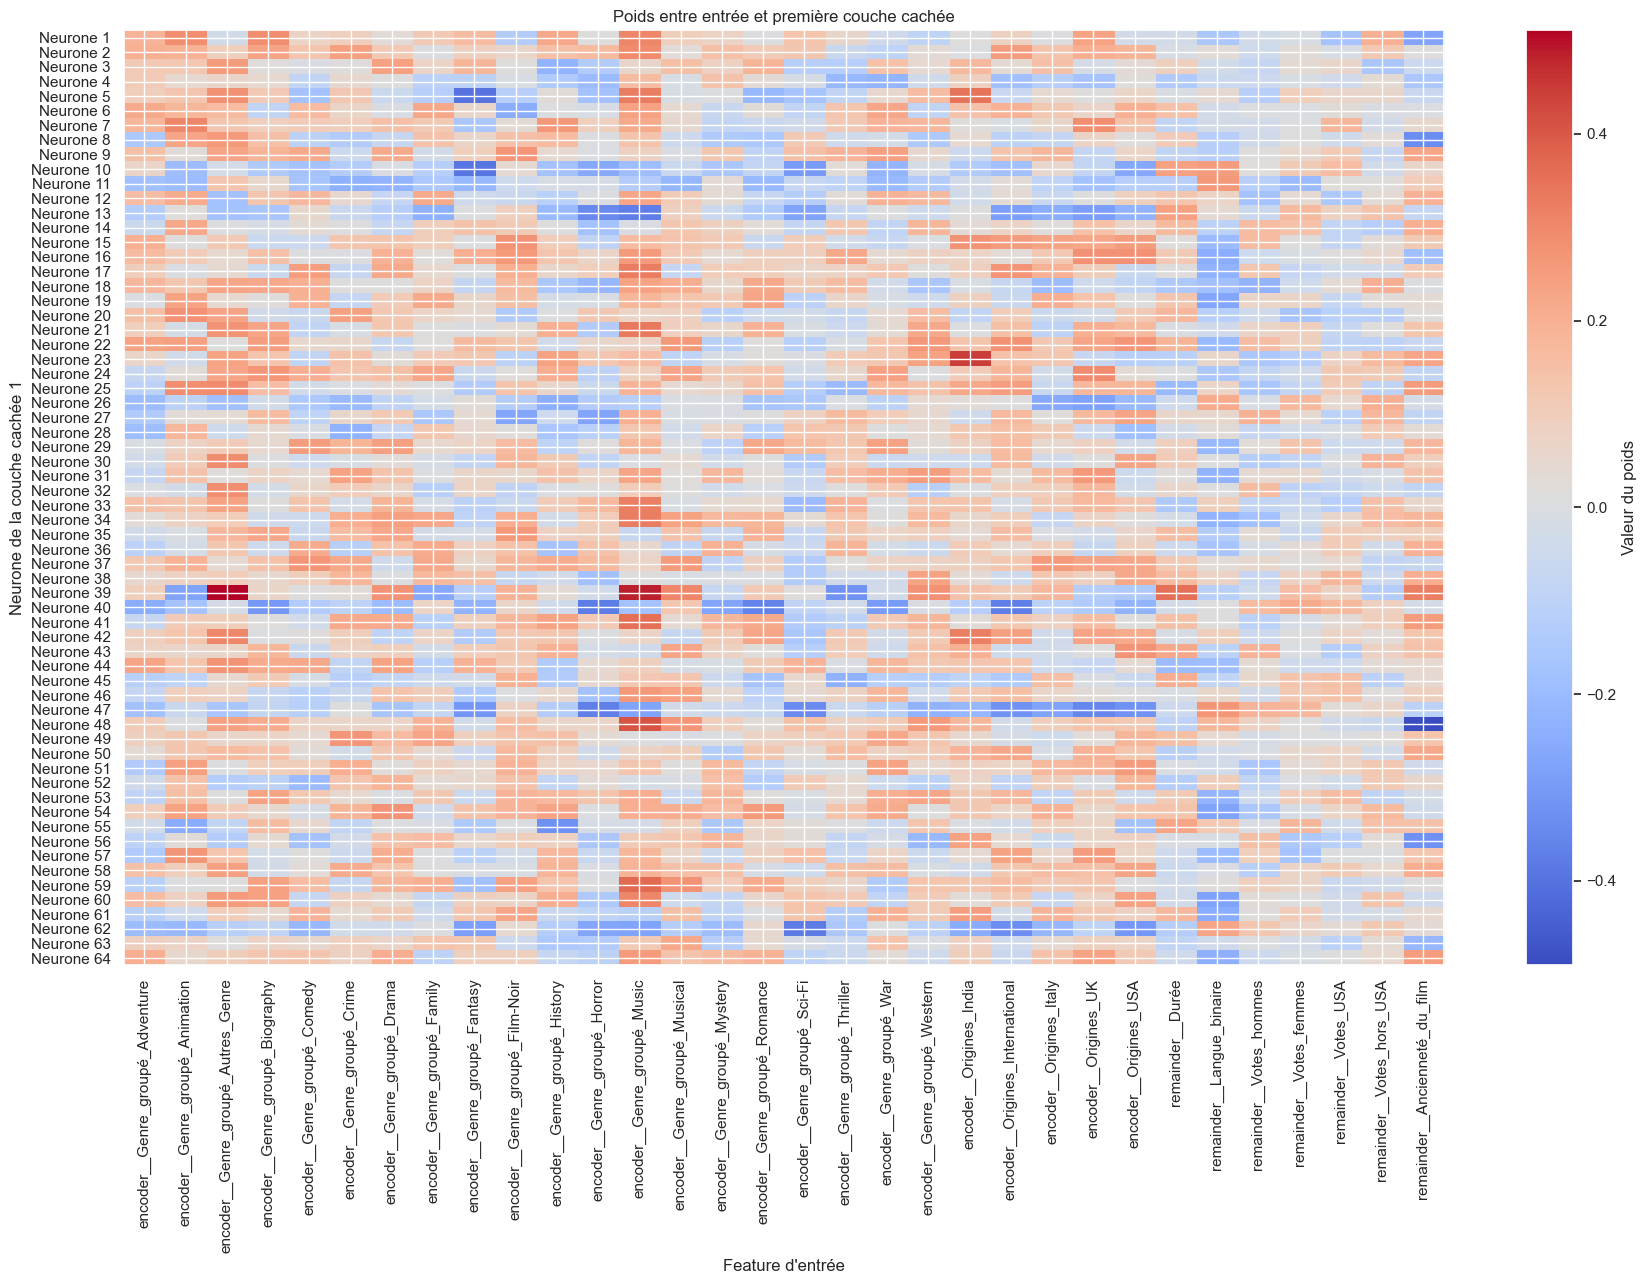

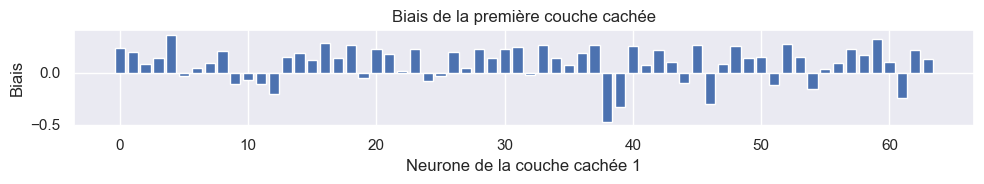

In [174]:
# Récupère les noms des features
feature_names = X_train.columns  # ou une liste de noms

# Récupère les poids et biais de la première couche linéaire du modèle fait avec PyTorch, à la derniére epoch
first_layer = [layer for layer in model.net if isinstance(layer, nn.Linear)][0]
weights_0 = first_layer.weight.detach().cpu().numpy()  # shape (neurones_cachés, features)
biases_0 = first_layer.bias.detach().cpu().numpy()     # shape (neurones_cachés,)

# Visualisation des poids de la première couche (entrée -> couche cachée 1)
plt.figure(figsize=(18, 13))
plt.imshow(weights_0, aspect='auto', cmap='coolwarm')
plt.colorbar(label='Valeur du poids')
plt.xlabel('Feature d\'entrée')
plt.ylabel('Neurone de la couche cachée 1')
plt.title('Poids entre entrée et première couche cachée')

# Ajout des noms de features sur l'axe X
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
# Ajout des index de neurones sur l'axe Y
plt.yticks(np.arange(weights_0.shape[0]), [f'Neurone {i+1}' for i in range(weights_0.shape[0])])

plt.tight_layout()
plt.show()

# Visualisation des biais de la première couche cachée
plt.figure(figsize=(10, 2))
plt.bar(range(len(biases_0)), biases_0)
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Biais')
plt.title('Biais de la première couche cachée')
plt.tight_layout()
plt.show()